## Sentiment Analysis of English Rap Lyrics

In [19]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('preprocessed.csv', delimiter=',')

# Initialize the sentiment analyzer 
sid = SentimentIntensityAnalyzer()

In [21]:
# Sentiment analysis
df['sentiments'] = df['lyrics'].apply(lambda lyrics: sid.polarity_scores(lyrics))

# Unpack the sentiment scores into the DataFrame
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [12]:
# Group by artist and calculate the average and standard deviation of sentiment scores
grouped_df = df.groupby('artist_name')[['pos', 'neu', 'neg', 'compound']].agg(['mean', 'std']).reset_index()

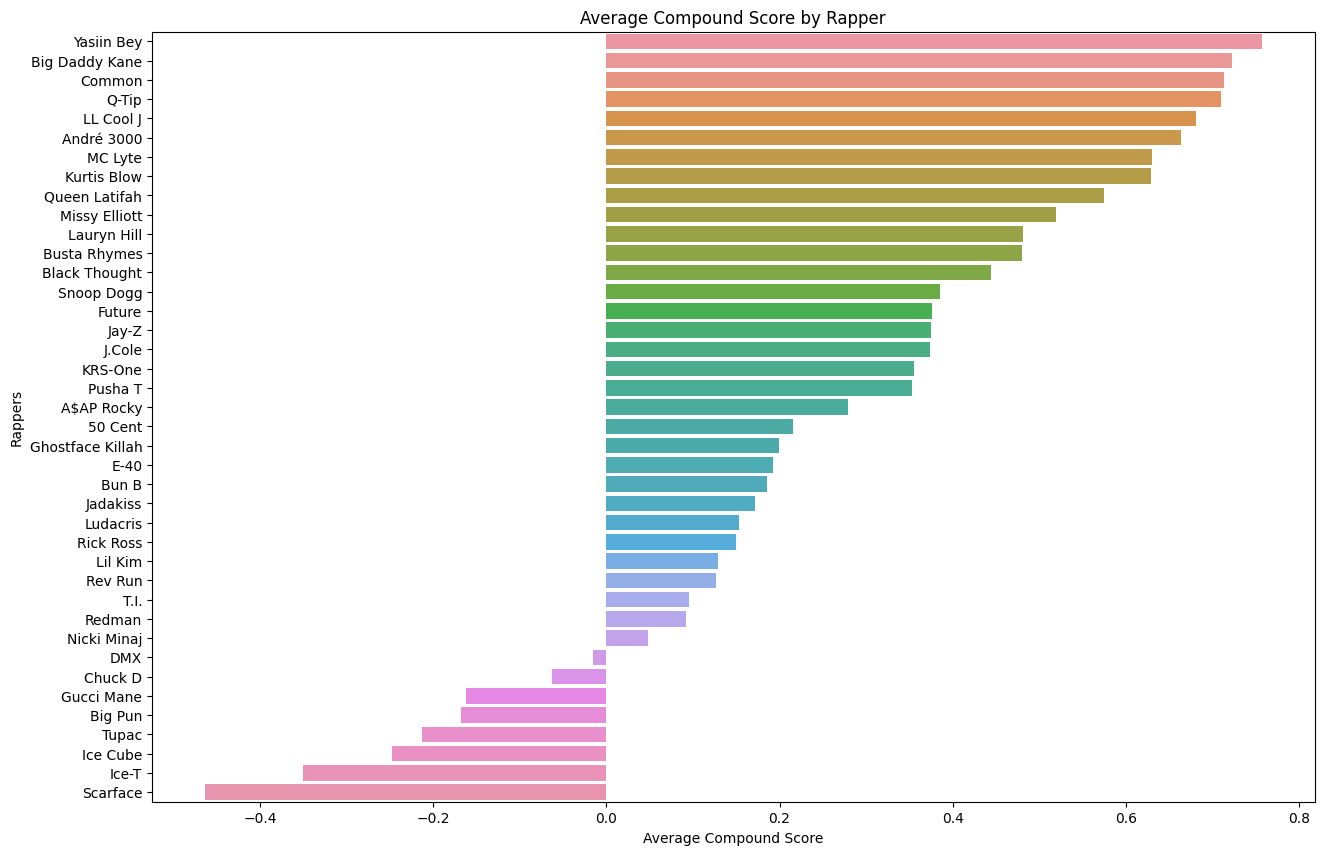

In [36]:
# Create a plot of average compound scores by rapper
grouped_df = grouped_df.sort_values(('compound','mean'), ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=('compound', 'mean'), y='artist_name', data=grouped_df)
plt.title('Average Compound Score by Rapper')
plt.xlabel('Average Compound Score')
plt.ylabel('Rappers')
plt.show()

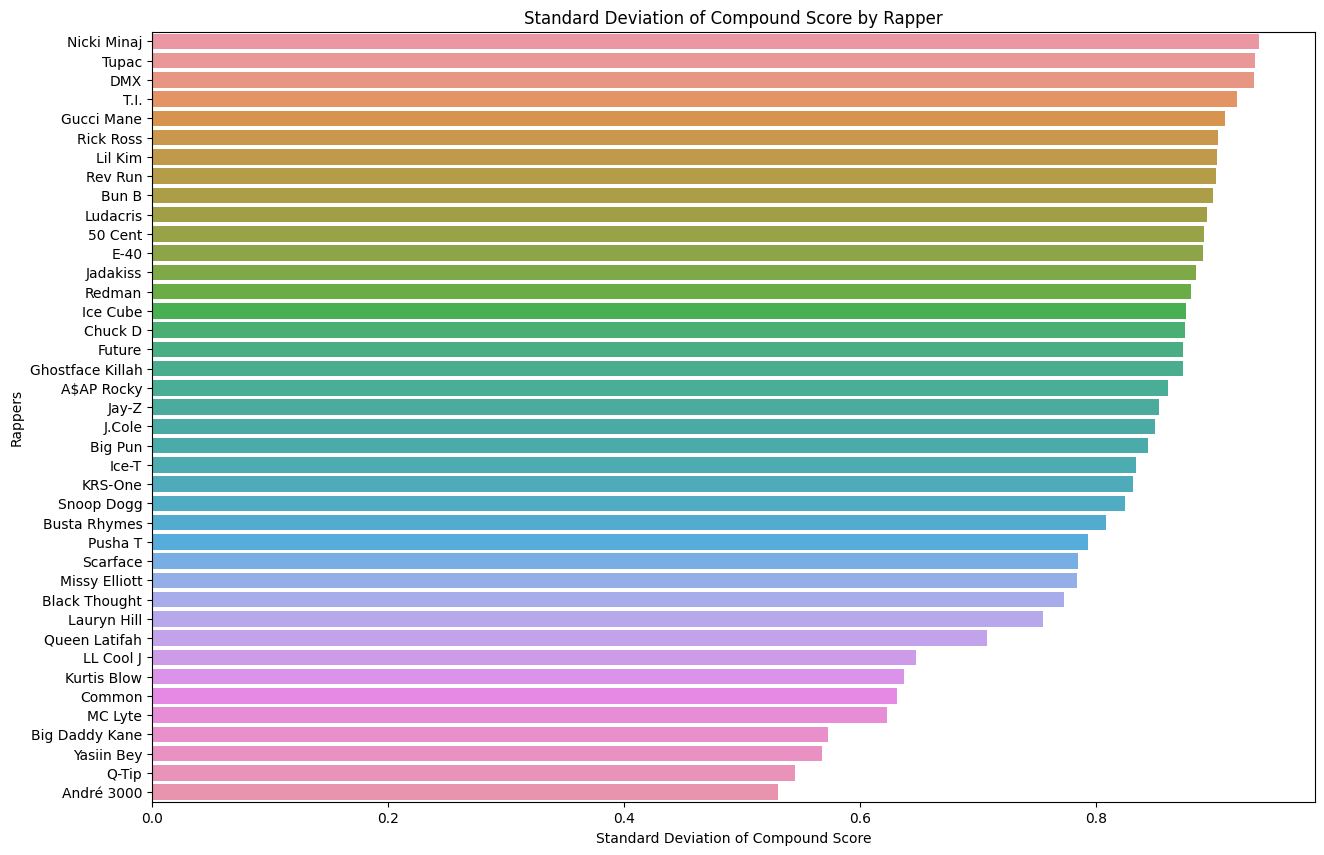

In [25]:
# Create a plot of standard deviation of compound scores by rapper
grouped_df = grouped_df.sort_values(('compound', 'std'), ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=('compound', 'std'), y='artist_name', data=grouped_df)
plt.title('Standard Deviation of Compound Score by Rapper')
plt.xlabel('Standard Deviation of Compound Score')
plt.ylabel('Rappers')
plt.show()

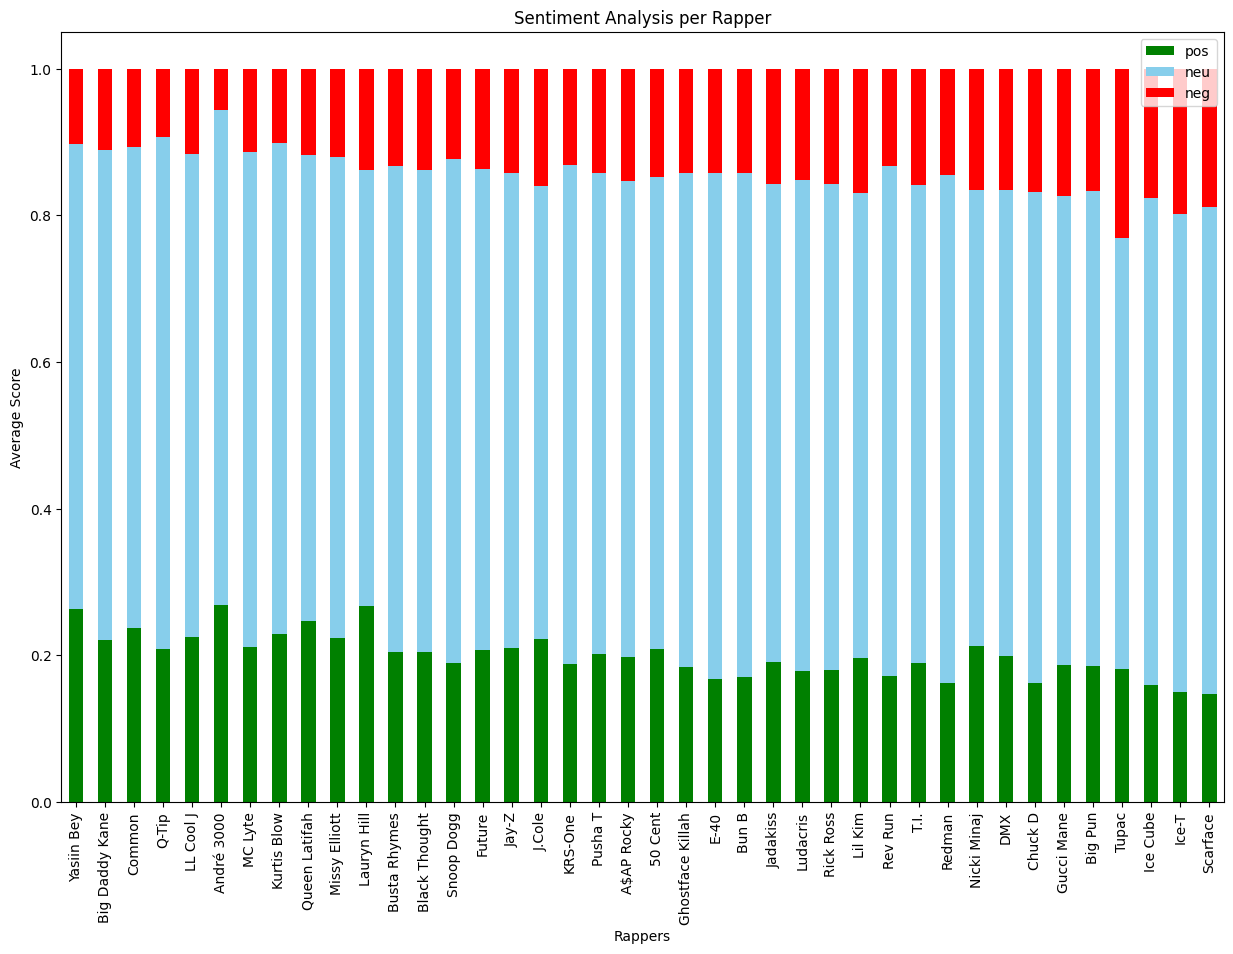

In [26]:
# Sentiment analysis breakdown per rapper
sentiment_breakdown = df.groupby('artist_name')[['pos', 'neu', 'neg', 'compound']].mean()

# sort by compound scores
sentiment_breakdown = sentiment_breakdown.sort_values(by='compound', ascending=False)
# drop column
sentiment_breakdown = sentiment_breakdown.drop(columns=['compound']) 

# plot
sentiment_breakdown.plot(kind='bar', stacked=True, figsize=(15,10), color=['green', 'skyblue', 'red'])
plt.title('Sentiment Analysis per Rapper')
plt.xlabel('Rappers')
plt.ylabel('Average Score')
plt.show()

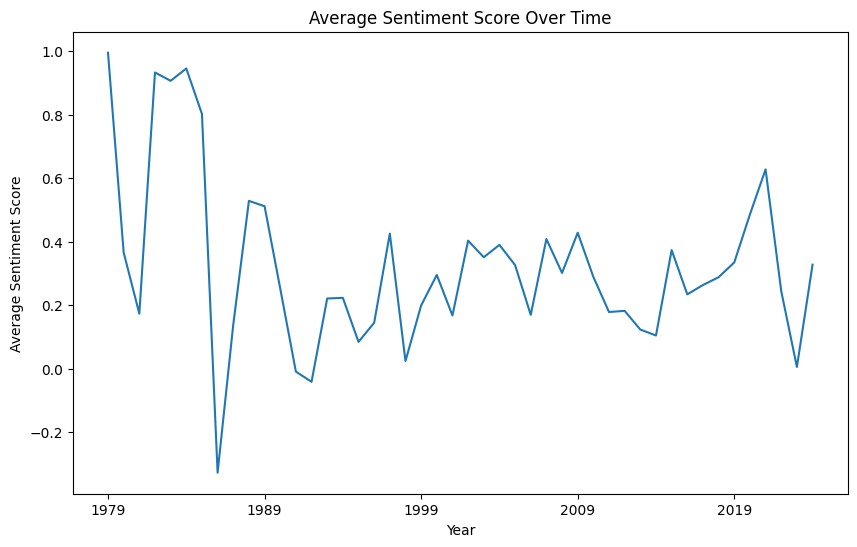

In [27]:
# time series analysis
yearly_sentiment = df.groupby('year')['compound'].mean()

# plot
plt.figure(figsize=(10, 6))
yearly_sentiment.plot(kind='line', legend=False)
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Year')  
plt.ylabel('Average Sentiment Score')

plt.show()

Rap sub-genre analysis

In [28]:
# Rap sub-genres: East Coast, West Coast, Gangsta, Trap, Hardcore, Conscious, Southern, and Old-School.
sub_genre = pd.DataFrame([
    ['50 Cent', 'Gangsta', 'East Coast'],
    ['A$AP Rocky', 'Trap', 'East Coast'],
    ['André 3000', 'Southern', 'Conscious'],
    ['Big Daddy Kane', 'Old-School', 'East Coast'],
    ['Big Pun', 'East Coast', 'Hardcore'],
    ['Black Thought', 'East Coast', 'Conscious'],
    ['Bun B', 'Southern', 'Gangsta'],
    ['Busta Rhymes', 'East Coast', 'Hardcore'],
    ['Chuck D (Public Enemy)', 'Conscious', 'Old-School'],
    ['Common', 'Conscious', 'Hardcore'],
    ['DMX', 'East Coast', 'Hardcore'],
    ['E-40', 'West Coast', 'Gangsta'],
    ['Future', 'Southern', 'Trap'],
    ['Ghostface Killah', 'East Coast', 'Hardcore'],
    ['Gucci Mane', 'Southern', 'Trap'],
    ['Ice Cube', 'West Coast', 'Gangsta'],
    ['Ice-T', 'West Coast', 'Gangsta'],
    ['Jadakiss', 'East Coast', 'Hardcore'],
    ['J.Cole', 'East Coast', 'Conscious'],
    ['Jay-Z', 'East Coast', 'Gangsta'],
    ['KRS-One', 'East Coast', 'Conscious'],
    ['Kurtis Blow', 'Old-School', 'East Coast'],
    ['Lauryn Hill', 'East Coast', 'Conscious'],
    ['Lil Kim', 'East Coast', 'Gangsta'],
    ['LL Cool J', 'Old-School', 'East Coast'],
    ['Ludacris', 'Southern', 'Gangsta'],
    ['MC Lyte', 'Old-School', 'East Coast'],
    ['Missy Elliott', 'East Coast', 'Hardcore'],
    ['Nicki Minaj', 'East Coast', 'Trap'],
    ['Pusha T', 'East Coast', 'Hardcore'],
    ['Q-Tip', 'East Coast', 'Conscious'],
    ['Queen Latifah', 'East Coast', 'Conscious'],
    ['Redman', 'East Coast', 'Hardcore'],
    ['Rev. Run', 'Old-School', 'East Coast'],
    ['Rick Ross', 'Southern', 'Gangsta'],
    ['Scarface', 'Southern', 'Gangsta'],
    ['Snoop Dogg', 'West Coast', 'Gangsta'],
    ['T.I.', 'Southern', 'Trap'],
    ['Tupac', 'West Coast', 'Gangsta'],
    ['Yasiin Bey (Mos Def)', 'East Coast', 'Conscious']
], columns=['artist_name', 'genre1', 'genre2'])

In [29]:
df = df.merge(sub_genre, on='artist_name', how='left')

In [30]:
# Group by primary genre and calculate the average and standard deviation of sentiment scores
grouped_genre1 = df.groupby('genre1')[['pos', 'neu', 'neg', 'compound']].agg(['mean', 'std']).reset_index()

# Group by secondary genre and calculate the average and standard deviation of sentiment scores
grouped_genre2 = df.groupby('genre2')[['pos', 'neu', 'neg', 'compound']].agg(['mean', 'std']).reset_index()

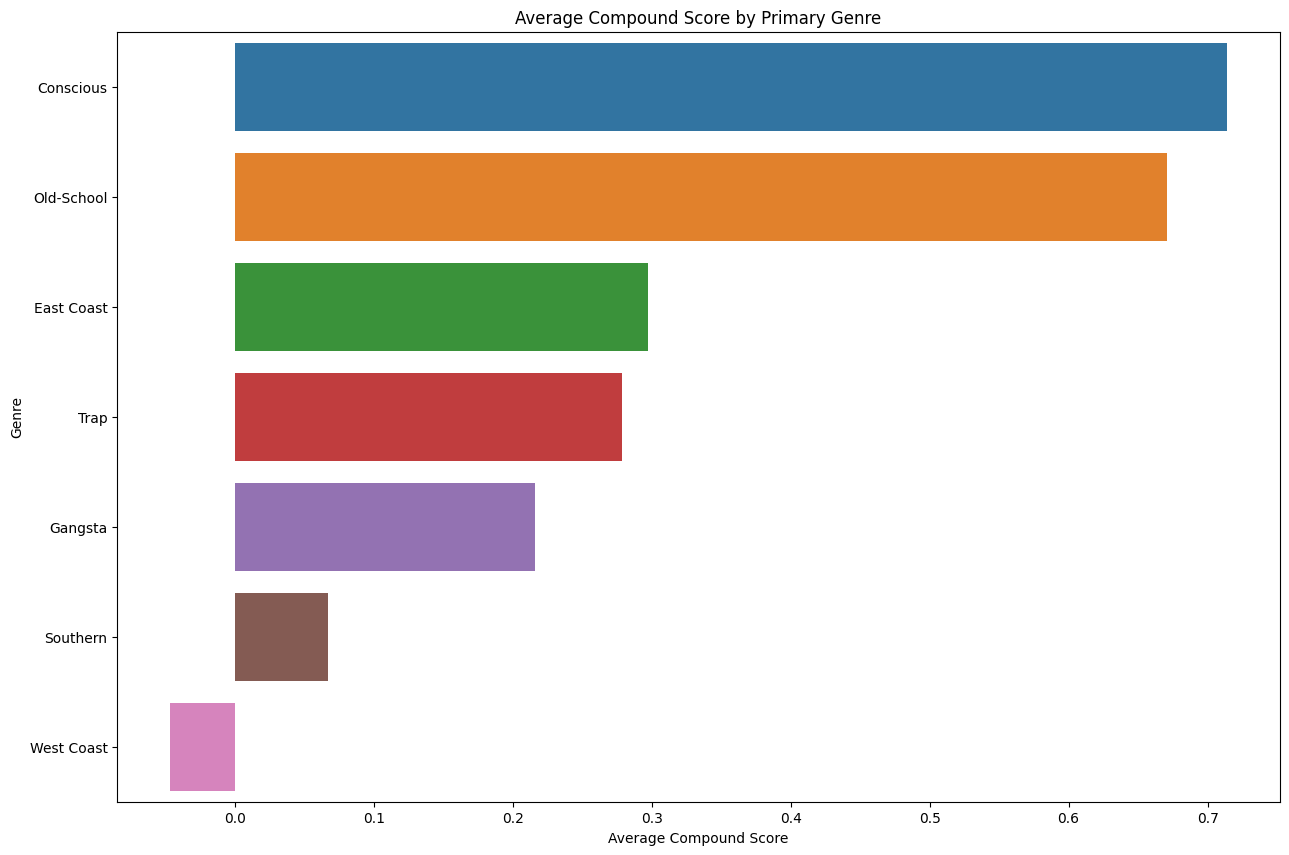

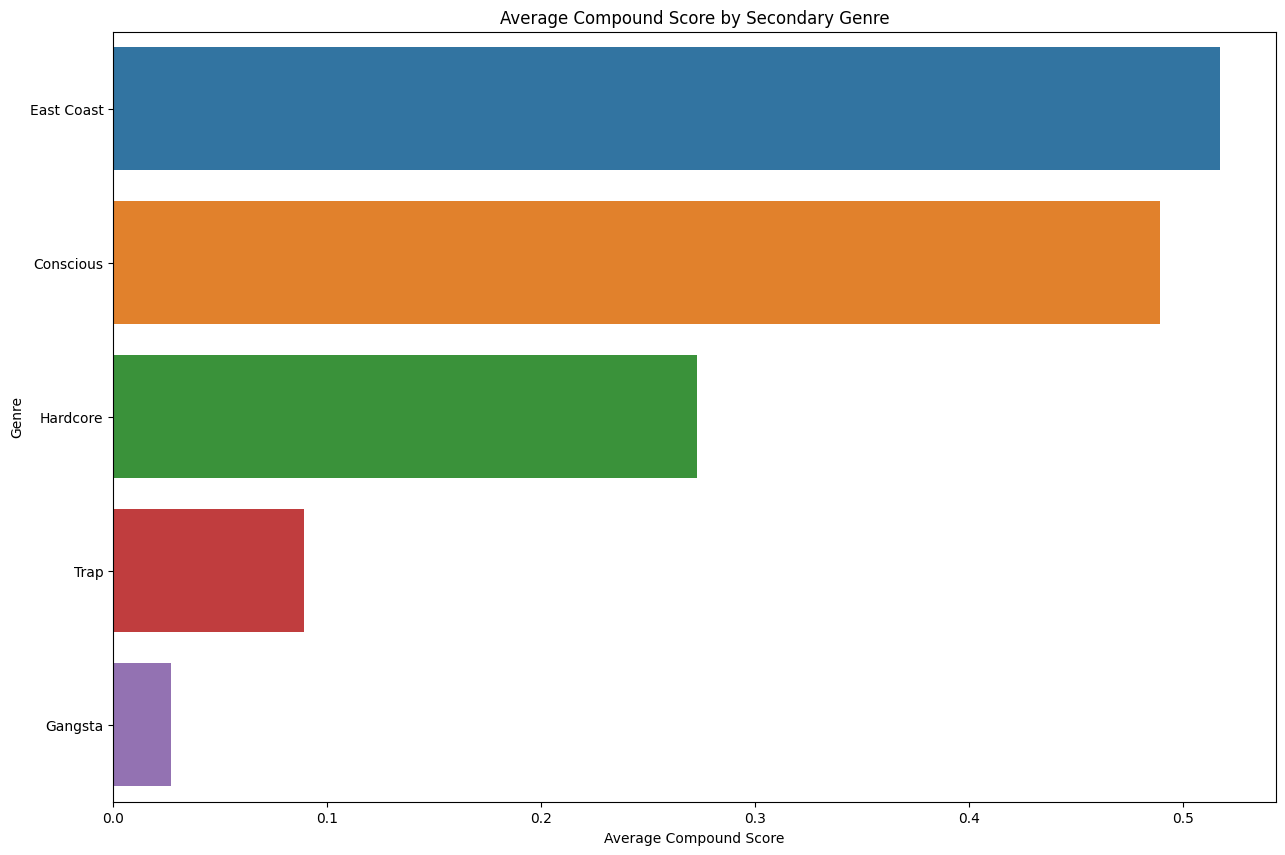

In [31]:
# Plot of average compound scores by primary genre
grouped_genre1 = grouped_genre1.sort_values(('compound', 'mean'), ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=('compound', 'mean'), y='genre1', data=grouped_genre1)
plt.title('Average Compound Score by Primary Genre')
plt.xlabel('Average Compound Score')
plt.ylabel('Genre')
plt.show()

# Plot of average compound scores by secondary genre
grouped_genre2 = grouped_genre2.sort_values(('compound', 'mean'), ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x=('compound', 'mean'), y='genre2', data=grouped_genre2)
plt.title('Average Compound Score by Secondary Genre')
plt.xlabel('Average Compound Score')
plt.ylabel('Genre')
plt.show()